In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [19]:
# Use the tuple() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0],coordinate[1]).country_code)


rikitea pf
khatanga ru
albany au
punta arenas cl
qaanaaq gl
sept-iles ca
santa cruz cr
dongsheng cn
port alfred za
hermanus za
uruacu br
tuktoyaktuk ca
airai pw
mataura pf
sinnamary gf
ushuaia ar
punta arenas cl
orissaare ee
mys shmidta ru
urdzhar kz
invermere ca
bubaque gw
airai pw
vaini to
butaritari ki
okhotsk ru
ushuaia ar
bethel us
karaul ru
rikitea pf
thompson ca
nkawkaw gh
punta arenas cl
tiksi ru
narsaq gl
rikitea pf
yellowknife ca
new norfolk au
namie jp
arraial do cabo br
albany au
saint-augustin ca
avarua ck
chuy uy
katiola ci
bethel us
atuona pf
hermanus za
ushuaia ar
taolanaro mg
alamosa us
nhulunbuy au
chokurdakh ru
cam ranh vn
mahaicony gy
yuzawa jp
yellowknife ca
hilo us
touros br
hasaki jp
punta arenas cl
oranjemund na
norman wells ca
alofi nu
port alfred za
evansville us
hobyo so
aloleng ph
buraydah sa
tumannyy ru
rikitea pf
port alfred za
mocuba mz
dikson ru
cidreira br
rikitea pf
saleaula ws
saint george bm
butaritari ki
tuktoyaktuk ca
hay river ca
pisco pe
pisco pe

sao filipe cv
norman wells ca
albany au
ushuaia ar
illoqqortoormiut gl
kodiak us
uglovka ru
puerto ayora ec
taoudenni ml
havre-saint-pierre ca
belushya guba ru
cidreira br
vaini to
galesong id
qaanaaq gl
thompson ca
vaini to
pochutla mx
meulaboh id
bredasdorp za
saskylakh ru
bajil ye
hanzhong cn
barentsburg sj
jaisalmer in
longyearbyen sj
ray in
jamestown sh
port elizabeth za
george za
kodiak us
yellowknife ca
busselton au
port alfred za
srednekolymsk ru
lorengau pg
souillac mu
port-gentil ga
new norfolk au
kodiak us
geraldton au
ushuaia ar
college us
kaitangata nz
vardo no
usinsk ru
machacamarca bo
petropavlovsk-kamchatskiy ru
hambantota lk
abu dhabi ae
trairi br
blyth gb
bilibino ru
rikitea pf
qaanaaq gl
port alfred za
tuatapere nz
monrovia lr
saint george bm
saint george bm
puerto ayora ec
hobart au
albany au
pullman us
qaqortoq gl
hofn is
port pirie au
yellowknife ca
nouadhibou mr
tuktoyaktuk ca
port alfred za
punta arenas cl
jamestown sh
castro cl
poya nc
port elizabeth za
tiksi r

taitung tw
busselton au
illoqqortoormiut gl
bredasdorp za
lebu cl
kruisfontein za
qaanaaq gl
rikitea pf
kapuskasing ca
albany au
angoche mz
iqaluit ca
belushya guba ru
taolanaro mg
kapaa us
leningradskiy ru
tuktoyaktuk ca
east london za
sao joao da barra br
puerto ayora ec
ushuaia ar
cabo san lucas mx
mahebourg mu
hofn is
bredasdorp za
ushuaia ar
thompson ca
bluff nz
chara ru
te anau nz
clyde river ca
cape town za
sioux lookout ca
punta arenas cl
butaritari ki
jamestown sh
wattegama lk
thompson ca
hilo us
palora ec
ushuaia ar
port hedland au
atuona pf
dikson ru
nanortalik gl
loei th
machico pt
jamestown sh
georgetown sh
nuuk gl
ushuaia ar
nikolskoye ru
hobart au
saint george bm
ilulissat gl
qaanaaq gl
mataura pf
jalu ly
mys shmidta ru
chicama pe
nikolskoye ru
moerai pf
thompson ca
takoradi gh
haines junction ca
arraial do cabo br
vaini to
marcona pe
astipalaia gr
ushuaia ar
barrow us
santa vitoria do palmar br
yakymivka ua
havre-saint-pierre ca
fortuna us
cayenne gf
khatanga ru
kaitang

In [20]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

619

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | sept-iles
Processing Record 7 of Set 1 | santa cruz
Processing Record 8 of Set 1 | dongsheng
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | uruacu
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | sinnamary
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | orissaare
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 20 of Set 1 | invermere
Processing Record 21 of Set 1 | bubaque
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | butaritari
Proc

Processing Record 37 of Set 4 | magalia
Processing Record 38 of Set 4 | namatanai
Processing Record 39 of Set 4 | wanaka
Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | greer
Processing Record 42 of Set 4 | tocache
Processing Record 43 of Set 4 | tolmezzo
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | kinanah
City not found. Skipping...
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | nome
Processing Record 49 of Set 4 | hobart
Processing Record 50 of Set 4 | mahibadhoo
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | leonforte
Processing Record 6 of Set 5 | puyo
Processing Record 7 of Set 5 | panama city
Processing Record 8 of Set 5 | komsomolskiy
Processing Record 9 of Set 5 | upernavik
Processing Re

Processing Record 28 of Set 8 | monrovia
Processing Record 29 of Set 8 | pullman
Processing Record 30 of Set 8 | qaqortoq
Processing Record 31 of Set 8 | hofn
Processing Record 32 of Set 8 | port pirie
Processing Record 33 of Set 8 | nouadhibou
Processing Record 34 of Set 8 | poya
Processing Record 35 of Set 8 | santa maria
Processing Record 36 of Set 8 | anadyr
Processing Record 37 of Set 8 | mrirt
City not found. Skipping...
Processing Record 38 of Set 8 | yerbogachen
Processing Record 39 of Set 8 | ust-nera
Processing Record 40 of Set 8 | ormara
Processing Record 41 of Set 8 | zyryanka
Processing Record 42 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 8 | juneau
Processing Record 44 of Set 8 | san patricio
Processing Record 45 of Set 8 | mislinja
Processing Record 46 of Set 8 | dingle
Processing Record 47 of Set 8 | giyon
Processing Record 48 of Set 8 | pteleos
Processing Record 49 of Set 8 | kabwe
Processing Record 50 of Set 8 | mahebourg
Processin

Processing Record 18 of Set 12 | mackay
Processing Record 19 of Set 12 | kembolcha
Processing Record 20 of Set 12 | nara
Processing Record 21 of Set 12 | ansermanuevo
Processing Record 22 of Set 12 | mosquera
Processing Record 23 of Set 12 | verkhniy landekh
Processing Record 24 of Set 12 | tommot
Processing Record 25 of Set 12 | lasa
Processing Record 26 of Set 12 | vilhena
Processing Record 27 of Set 12 | yar-sale
Processing Record 28 of Set 12 | mitchell
Processing Record 29 of Set 12 | akcakoca
Processing Record 30 of Set 12 | barranca
Processing Record 31 of Set 12 | caravelas
Processing Record 32 of Set 12 | barbastro
Processing Record 33 of Set 12 | yarensk
Processing Record 34 of Set 12 | nyrob
Processing Record 35 of Set 12 | bacuit
City not found. Skipping...
Processing Record 36 of Set 12 | sorong
Processing Record 37 of Set 12 | ferme-neuve
Processing Record 38 of Set 12 | leh
Processing Record 39 of Set 12 | banjar
Processing Record 40 of Set 12 | paita
Processing Record 4

In [24]:
len(city_data)

574

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.85,73,59,16.58,PF,2021-09-26 03:45:12
1,Khatanga,71.9667,102.5000,35.02,71,91,13.22,RU,2021-09-26 03:45:13
2,Albany,42.6001,-73.9662,59.99,90,100,2.55,US,2021-09-26 03:45:13
3,Punta Arenas,-53.1500,-70.9167,37.51,81,75,8.05,CL,2021-09-26 03:42:17
4,Qaanaaq,77.4840,-69.3632,17.29,69,64,7.76,GL,2021-09-26 03:45:14
5,Sept-Iles,50.2001,-66.3821,54.12,97,90,1.01,CA,2021-09-26 03:45:14
6,Santa Cruz,-17.8000,-63.1667,74.66,64,2,6.91,BO,2021-09-26 03:41:36
7,Dongsheng,39.8161,109.9776,65.95,60,100,6.24,CN,2021-09-26 03:45:15
8,Port Alfred,-33.5906,26.8910,59.94,81,42,9.62,ZA,2021-09-26 03:45:15
9,Hermanus,-34.4187,19.2345,58.89,86,74,6.08,ZA,2021-09-26 03:45:15


In [26]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df=city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-26 03:45:12,-23.1203,-134.9692,73.85,73,59,16.58
1,Khatanga,RU,2021-09-26 03:45:13,71.9667,102.5000,35.02,71,91,13.22
2,Albany,US,2021-09-26 03:45:13,42.6001,-73.9662,59.99,90,100,2.55
3,Punta Arenas,CL,2021-09-26 03:42:17,-53.1500,-70.9167,37.51,81,75,8.05
4,Qaanaaq,GL,2021-09-26 03:45:14,77.4840,-69.3632,17.29,69,64,7.76
...,...,...,...,...,...,...,...,...,...
569,Santa Vitoria Do Palmar,BR,2021-09-26 03:48:47,-33.5189,-53.3681,56.59,97,45,1.10
570,Yakymivka,UA,2021-09-26 03:48:48,46.6897,35.1536,57.07,63,85,11.88
571,Fortuna,US,2021-09-26 03:48:48,40.5982,-124.1573,58.19,64,90,4.00
572,Saurimo,AO,2021-09-26 03:48:49,-9.6608,20.3916,63.59,56,43,2.01


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

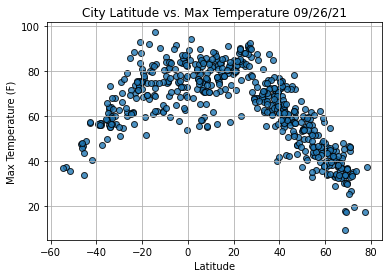

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

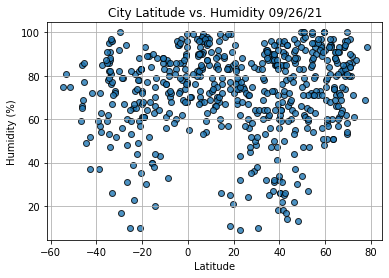

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

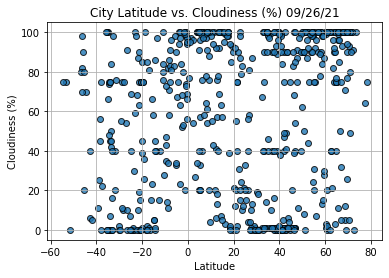

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

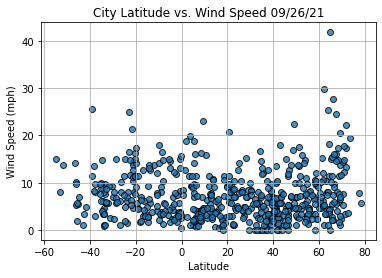

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()